In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


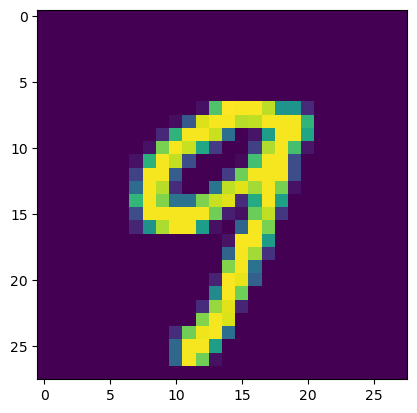

9


In [7]:
plt.imshow(x_train[45])
plt.show()
print(y_train[45])

In [8]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
x_train=x_train/255
x_test=x_test/255

In [19]:
# model= keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(50,activation='relu'),
#     keras.layers.Dense(50,activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\ashnk\anaconda3\envs\genai\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8888 - loss: 0.3731 - val_accuracy: 0.9845 - val_loss: 0.0554
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9844 - loss: 0.0502 - val_accuracy: 0.9870 - val_loss: 0.0450
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.9905 - val_loss: 0.0353
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9931 - loss: 0.0230 - val_accuracy: 0.9892 - val_loss: 0.0383
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9953 - loss: 0.0160 - val_accuracy: 0.9915 - val_loss: 0.0354


In [21]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0334


In [22]:
print(accuracy)

0.9908999800682068


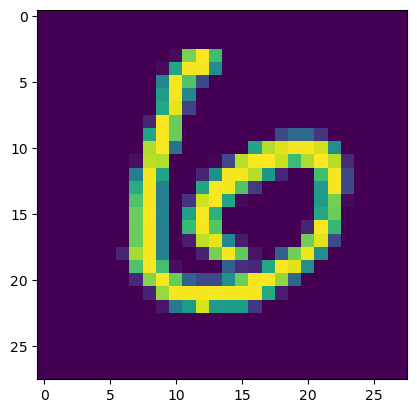

6


In [23]:
plt.imshow(x_test[11])
plt.show()
print(y_test[11])

In [24]:
y_pred=model.predict(x_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
(10000, 10)


In [25]:
print(y_pred[11])

[2.8380509e-07 3.9216525e-13 1.9681647e-14 1.9867827e-13 1.0914023e-11
 1.4636018e-09 9.9999976e-01 2.5852576e-15 9.8401172e-09 3.2329174e-12]


In [26]:
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [27]:
print(y_pred_label[11])

6


In [28]:
conf_mat = confusion_matrix(y_test, y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 975    1    1    0    0    1    0    1    1    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   0    0 1025    0    0    0    0    7    0    0]
 [   0    1    1 1001    0    4    0    1    2    0]
 [   0    0    0    0  964    0    0    1    1   16]
 [   1    0    1    6    0  882    1    0    0    1]
 [   5    2    1    0    1    4  943    0    2    0]
 [   0    2    1    1    0    0    0 1020    1    3]
 [   2    0    3    1    0    1    0    2  963    2]
 [   0    0    1    0    0    2    0    2    1 1003]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted Labels')

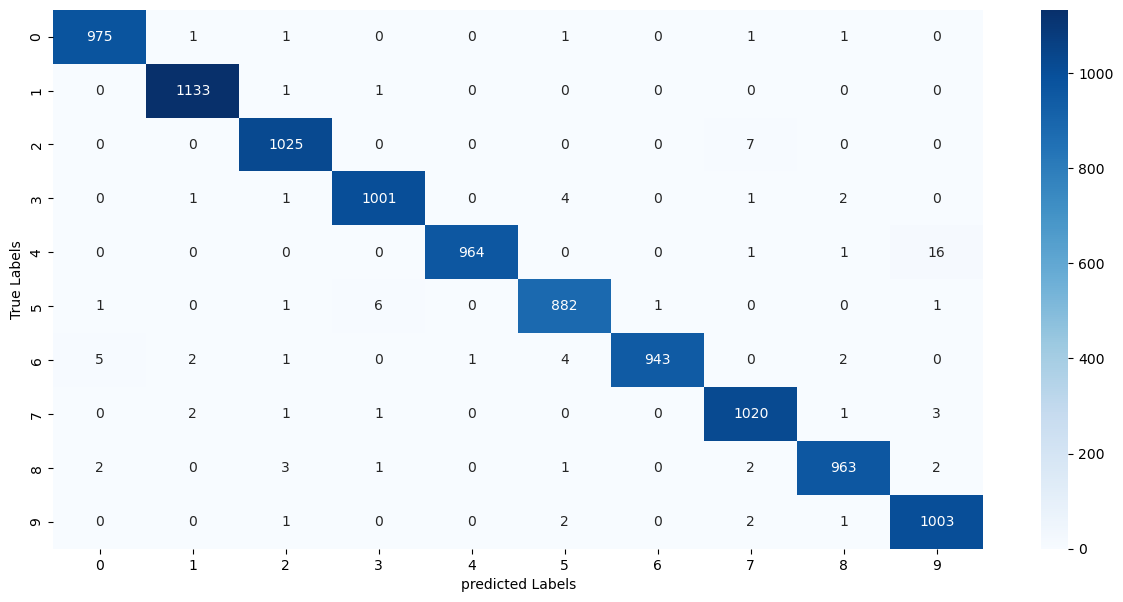

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('predicted Labels')

In [ ]:
# input_image_path=input('path of image')

# input_image= cv2.imread(input_image_path)

# cv2.imshow(input_image)

# grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# print(grayscale.shape)

# input_image_resize = cv2.resize(grayscale, (28,28))

# print(input_image_resize)

# input_image_resize= input_image_resize/255

# image_reshaped = np.reshape(input_image_resize,[1,28,28])

# input_prediction = model.predict(image_reshaped)

# input_pred_label = np.argmax(input_prediction)

# print('The handwriiten digin is recognised as', input_pred_label)